# Ch.2 Classifying with k-Nearest Neighbors


## 2.1 Classifying with distance measurements

### k-Nearest Neighbors (kNN)
* 장점: 높은 정확성, 이상치(outlier)에 둔감, 데이터에 대한 가정 불필요
* 단점: 계산 비용 높음, 많은 메모리 필요
* 자료: 수치형, 명목형

### $ 교재 p.24~25 설명

### General approach to kNN
1. Collect:
  - 모든 방법
2. Prepare:
  - 수치형 값(거리 계산을 위해), 구조적 데이터가 가장 좋음
3. Analyze:
  - 모든 방법
4. Train:
  - 필요 없음
5. Test:
  - 오류율(error rate) 계산
6. Use:
  - 구조화된 수치 입력 및 출력 데이터 준비
  - 그런 다음 입력에 대해 kNN 알고리즘 적용하여 입력 데이터가 어디에 속하는지 판단
  - 그후 애플리케이션에서 판단된 클래스에 대해 어떤 액션을 취함

## 2.1.1 Prepare: Importing data with Python

In [2]:
import numpy as np      # 옛날 책이어서 파이썬 2 버전으로 되어있음.

In [3]:
def createDataSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [4]:
group, labels = createDataSet()

In [5]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [6]:
labels

['A', 'A', 'B', 'B']

In [7]:
type(group)

numpy.ndarray

In [8]:
import kNN   # print 항목 ()로 묶어줄것!!

In [9]:
group, labels = kNN.createDataSet()     # kNN.py에 있는 createDataSet()을 씀

In [10]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [11]:
labels

['A', 'A', 'B', 'B']

In [12]:
group.shape     # 4행 2열 / 

(4, 2)

## 2.1.2 Putting the kNN classification algorithm into action

### $ kNN 알고리즘 의사코드 (교재 p.29)

##### Listing 2.1 k-Nearest Neighbors algorithm for Python 2

In [13]:
import numpy as np

# Python2 버전
def classify0_p2(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]   #1
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet   #2
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndices = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)   #3
    return sortedClassCount[0][0]   # 4

In [14]:
# classify0 함수의 매개변수 설정
# dataSet: numpy.ndarray 타입
inX = [0, 0]
dataSet = group
k = 3

In [15]:
# 데이터 수 (2차원 배열의 행 개수) -- Python3 에선 불필요
dataSetSize = dataSet.shape[0]; dataSetSize

4

### 두 점 간 거리 구하기
* 피타고라스의 정리: https://ko.wikipedia.org/wiki/피타고라스의_정리 
* 두 점 사이의 거리(선분의 길이): https://www.youtube.com/watch?v=iSInGiiUOhI
* 두 점을 지나는 직선의 기울기: https://www.youtube.com/watch?v=2hKtZXyV-9o

In [16]:
# 분류하고자 하는 점 inX를 데이터 집합의 행 개수만큼 복제한 후 데이터 집합의 점과의 차를 구함
diffMat = inX - dataSet; diffMat

np.tile(inX,(dataSetSize,1)) - dataSet

array([[-1. , -1.1],
       [-1. , -1. ],
       [ 0. ,  0. ],
       [ 0. , -0.1]])

### $ numpy.tile - for Python2
https://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html

In [17]:
import numpy as np
a = np.array([0, 1, 2])
a

array([0, 1, 2])

In [18]:
np.tile(a, 2)    # 1차원 배열         ( a를 2번)

array([0, 1, 2, 0, 1, 2])

In [19]:
np.tile(a, (1, 2))   # 2차원 배열    (a를 (1,2))

array([[0, 1, 2, 0, 1, 2]])

In [20]:
np.tile(a, (2, 1))   # 2차원 배열  (a를 (2,1)

array([[0, 1, 2],
       [0, 1, 2]])

In [21]:
np.tile(a, (2, 1, 2))   # 3차원 배열

array([[[0, 1, 2, 0, 1, 2]],

       [[0, 1, 2, 0, 1, 2]]])

In [22]:
np.tile(a, (2, 3, 4))

array([[[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2],
        [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2],
        [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],

       [[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2],
        [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2],
        [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]]])

In [23]:
b = np.array([[0, 1], [2, 3]]); b

array([[0, 1],
       [2, 3]])

In [24]:
np.tile(b, 2)   # (2,2) 를 (2.4)

array([[0, 1, 0, 1],
       [2, 3, 2, 3]])

In [25]:
np.tile(b, (1, 2))

array([[0, 1, 0, 1],
       [2, 3, 2, 3]])

In [26]:
np.tile(b, (2, 1))

array([[0, 1],
       [2, 3],
       [0, 1],
       [2, 3]])

In [27]:
np.tile(b, (3, 2, 1))

array([[[0, 1],
        [2, 3],
        [0, 1],
        [2, 3]],

       [[0, 1],
        [2, 3],
        [0, 1],
        [2, 3]],

       [[0, 1],
        [2, 3],
        [0, 1],
        [2, 3]]])

In [28]:
print(dataSetSize)
np.tile([0, 0], (dataSetSize, 1))     
                  # (4,1)로 됨.

4


array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

##### -- end of numpy.tile

In [29]:
# 차를 제곱하고
sqDiffMat = diffMat**2; sqDiffMat

 # (1+1) / 2 / 0 / 0.01

array([[1.  , 1.21],
       [1.  , 1.  ],
       [0.  , 0.  ],
       [0.  , 0.01]])

In [30]:
# 행 방향으로 더한 후
sqDistances = sqDiffMat.sum(axis=1); sqDistances   # row-wise summation

array([2.21, 2.  , 0.  , 0.01])

### $ numpy.ndarry.sum = numpy.sum
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.sum.html
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html#numpy.sum

In [31]:
np.sum([])   # 빈 배열의 합

0.0

In [32]:
np.sum([1.1, 0.7, 0.2, 1.5], dtype=np.int32)   # 실수를 32비트 정수형으로 변환한 후 합계

2

In [33]:
np.sum([0.5, 1.5])   # axis 옵션이 없으면 모든 원소를 더함

2.0

In [34]:
print(np.sum([[0, 1], [0, 5]]))           
print(np.sum([[0, 1], [0, 5]], axis=0))
print(np.sum([[0, 1], [0, 5]], axis=1))

6
[0 6]
[1 5]


In [35]:
print(np.ones(5))
print(np.ones((3, 4)))

[1. 1. 1. 1. 1.]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [36]:
print(np.ones(5).sum())   # ndarray 객체의 메소드로 사용
print(np.ones((3, 4)).sum(axis=0))
print(np.ones((3, 4)).sum(axis=1))

5.0
[3. 3. 3. 3.]
[4. 4. 4.]


In [37]:
a = np.array([[2, 3], [8, 4]]); a

array([[2, 3],
       [8, 4]])

In [38]:
print(a.sum())
print(a.sum(0))
print(a.sum(axis=0))
print(a.sum(1))

17
[10  7]
[10  7]
[ 5 12]


##### -- end of numpy.ndarray.sum

In [39]:
# 제곱근을 적용하여 inX와 모든 데이터 셋 점간의 거리를 구함
distances = sqDistances**0.5; distances

array([1.48660687, 1.41421356, 0.        , 0.1       ])

In [40]:
# 거리가 가까운 순으로 정렬
# 거리를 정렬하되 정렬된 결과의 점이 필요하므로 인덱스 값이 정렬되도록 함
sortedDistIndices = distances.argsort(); sortedDistIndices
                    # 넘파이 배열로 잡음  /     
    # 3번째 값이 제일 작은 값이다. 인덱스 값이 나옴 위치 값 2
    # 4번째 값이                                      3
    # 2번째 값이                                      1
    # 1번째 값이                                      0

array([2, 3, 1, 0], dtype=int64)

### $ numpy.argsort
* 반환값: 배열이 정렬되었을 때의 인덱스 배열(ndarray, int)
* 마지막 축을 기준으로 정렬(기본값)
https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html

* 정렬 축 지정 가능

In [41]:
# 1차원 배열
x = np.array([3, 1, 2]); print(x)
print(np.argsort(x))
print(x[np.argsort(x)])

[3 1 2]
[1 2 0]
[1 2 3]


In [42]:
# 2차원 배열
x = np.array([[0, 3], [2, 2]]); print(x)
print(np.argsort(x, axis=0))
print(np.argsort(x, axis=1))
print(np.argsort(x, axis=-1))   # 마지막 축을 기준으로 정렬

[[0 3]
 [2 2]]
[[0 1]
 [1 0]]
[[0 1]
 [0 1]]
[[0 1]
 [0 1]]


In [43]:
# 3차원 배열
x = np.array([[[8, 1, 4], [1, 2, 5]], [[4, 2, 7], [6, 5, 4]]]); print(x)
print(np.argsort(x, axis=2))
print(np.argsort(x))
print(np.argsort(x, axis=0))

[[[8 1 4]
  [1 2 5]]

 [[4 2 7]
  [6 5 4]]]
[[[1 2 0]
  [0 1 2]]

 [[1 0 2]
  [2 1 0]]]
[[[1 2 0]
  [0 1 2]]

 [[1 0 2]
  [2 1 0]]]
[[[1 0 0]
  [0 0 1]]

 [[0 1 1]
  [1 1 0]]]


In [44]:
# 키 값으로 정렬
x = np.array([(1, 0), (0, 1)], dtype=[('x', '<i4'), ('y', '<i4')]); x

array([(1, 0), (0, 1)], dtype=[('x', '<i4'), ('y', '<i4')])

#### numpy의 구조적 데이터 타입을 사용한 인자 정렬
* numpy.dtype: https://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html

In [45]:
np.argsort(x, order=('x', 'y'))

array([1, 0], dtype=int64)

In [46]:
np.argsort(x, order=('y', 'x'))

array([0, 1], dtype=int64)

##### -- end of numpy.argsort

In [53]:
# 딕셔너리 변수 준비
classCount = {}

for i in range(k):   # k 회수만큼 반복
    voteIlabel = labels[sortedDistIndices[i]]
    classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    

In [54]:
# k번째 가까운 점의 인덱스 값을 구한 후 그 점의 레이블을 저장
# 처음 수행한다면
print(sortedDistIndices[0])   ## 가장 가까운 값  =  3번째 인덱스  =>  0
print(labels)
voteIlabel = labels[sortedDistIndices[0]]; print(voteIlabel)
               # 3번째 데이타                # i번째 레이블

2
['A', 'A', 'B', 'B']
B


In [55]:
# 레이블을 키, 레이블의 회수를 값으로 하는 딕셔너리 classCount
# classCount 딕셔너리의 키 값에 없는 레이블(처음 나타난 레이블)이면 get 함수가 0을 리턴
print(classCount)
print(classCount.get(voteIlabel, 0))
print(classCount.get(voteIlabel, 0) + 1)

{}
0
1


### $ 딕셔너리 함수: get
https://wikidocs.net/16 에서 'get' 검색

In [56]:
# classCount 딕셔너리 갱신하고 이후 k 회수만큼 반복
print(classCount)
classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1; print(classCount)

{}
{'B': 1}


In [57]:
classCount = {}
for i in range(k):   # k 회수만큼 반복           # 2,3,1  3개만 가져옴.  /  
    voteIlabel = labels[sortedDistIndices[i]]
    classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1

In [58]:
classCount

{'B': 2, 'A': 1}

In [59]:
print(classCount)

{'B': 2, 'A': 1}


In [60]:
sortedClassCount = sorted(classCount, reverse=True)  # 내림차순으로 정렬
sortedClassCount

['B', 'A']

##### Listing 2.1 k-Nearest Neighbors algorithm for Python 3

In [ ]:
import numpy as np

# Python3 버전
def classify0(inX, dataSet, labels, k):
    diffMat = inX - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndices = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount,
                              reverse=True)
    return sortedClassCount[0]

### $ Python3 정렬
https://docs.python.org/3/howto/sorting.html
* sorted() 함수: https://docs.python.org/3/library/functions.html#sorted
    - key 인자: 정렬에 사용될 함수를 받음

In [115]:
sortedClassCount = sorted(classCount, key=classCount.get, reverse=True); sortedClassCount

# 정렬된 사전의 키 값이 나옴. / 이 중에 첫번째 . B가 제일 많이 나왔다.   => B클래스로 분류하면 된다.

['B', 'A']

In [116]:
type(sortedClassCount)

list

In [117]:
print(sortedClassCount[0])

B


### kNN 테스트

In [135]:
import imp
imp.reload(kNN)

<module 'kNN' from 'C:\\dev\\_python\\machinelearninginaction\\Ch02\\kNN.py'>

In [136]:
group, labels = kNN.createDataSet()   # 0,0은 A그룹인가? B그룹인가?

In [137]:
kNN.classify0([0, 0], group, labels, 3)

'B'

In [140]:
kNN.classify0([1, 0.8], group, labels, 3)


'B'

# 2.2 Example: improving matches from a dating site with kNN

### 내 친구 헬렌
* 3 types of people she went out with:
    - People she didn't like
    - People she liked in small doses
    - People she liked in large doese

### Example: using kNN on results from a dating site
1. Collect:
  - 텍스트 파일 제공됨
2. Prepare:
  - 파이썬에서 텍스트 파일 파싱
3. Analyze:
  - Matplotlib을 사용하여 데이터의 2차원 플롯 생성
4. Train:
  - kNN 알고리즘에는 훈련이 필요없음
5. Test:
  - 헬렌이 준 데이터 중 일부를 테스트 데이터로 사용하는 함수 작성
  - 테스트 데이터는 비테스트 데이터와 구별
  - 예측된 클래스가 실제 클래스와 일치하지 않으면 오류
6. Use:
  - 헬렌이 입력한 몇몇 값을 바탕으로 헬렌이 좋아하는 상대인지 예측하는 간단한 명령행 프로그램 작성

## 2.2.1 Prepare: parsing data from a text file

* datingTestSet.txt
 - 1,000 entries              :/  마지막칸 좋아한다 / 보통 / 안 좋아한다.
 - features
   - Number of frequent flyer miles earned per year
   - Percentage of time spent playing video games
   - Liters of ice cream consumed per week 

### file2matrix 함수
* 텍스트 파일의 데이터를 분류기가 사용할 수 있는 형태로 변환
* 입력: 파일 이름
* 출력: 훈련 데이터(행렬), 클래스 레이블(벡터)

##### Listing 2.2 Text record to NumPy parsing code for Python 2, 3

In [142]:
import numpy as np

# 원본: Python3에서도 실행 가능
def file2matrix(filename):
    fr = open(filename)
    
    # 훈련 데이터(returnMat)와 클래스 레이블(classLabelVector) 변수 준비
    numberOfLines = len(fr.readlines())      # 텍스트 파일의 라인 개수             
    returnMat = np.zeros((numberOfLines, 3)) # 텍스트_라인수 X 3 크기의 영행렬 준비  # 1000 x 3 짜리 행렬을 만들어놓음 (공간 미리 확보)
    classLabelVector = []                    # 클래스 레이블 변수 준비          # 클래스를 받은 빈 벡터를 만들어놓음.
    
    # readlines() 는 파일 끝까지 읽은 뒤 포인터를 파일의 처음으로 돌려놓지 않으므로
    # 파일 내용을 다시 읽으려면 open() 을 사용하여 파일을 다시 읽어야 한다.
    fr = open(filename)        # 다시 오픈해서 읽어들이겠다.
    index = 0            # 반환할 행렬의 로우 인덱스          
    
    for line in fr.readlines():       # 1000건의 데이터를 읽어들임.
        # 문자열 양 옆 공백 제거
        line = line.strip()           
        
        # 문자열을 탭('\t')을 기준으로 단어로 분리하여 리스트로 반환
        listFromLine = line.split('\t') 
        
        # returnMat의 인덱스 로우에 위 리스트의 첫 번째부터 세 번째 값을 저장
        returnMat[index, :] = listFromLine[0:3]          
               # 1000행 3열짜리      / 4개의 값이 들어있는 리스트 중에서 0,1,2   3개만 취하겠다는 의미. 
               #그 값을 returnMat 첫번째 row에 값을 대입하겠다.
                
        # classLabelVector 리스트에 listFromLine 리스트의 마지막 값을 저장
        classLabelVector.append(listFromLine[-1]) # 마지막 3, 4번째 값을 넣어줌.
        index += 1       # 자료를 다 넣어주고, 인덱스 값을 1 더해줌 ( 인덱스 값을 바꿈 )
        
    return returnMat, classLabelVector


### 원본 file2matrix 함수 설명

In [143]:
filename = 'datingTestSet.txt'
fr = open(filename)    # default file access mode: read

In [144]:
# 훈련 데이터(returnMat)와 클래스 레이블(classLabelVector) 변수 준비
numberOfLines = len(fr.readlines())      # 텍스트 파일의 라인 개수
returnMat = np.zeros((numberOfLines, 3)) # 텍스트_라인수 X 3 크기의 영행렬 준비
classLabelVector = []                    # 클래스 레이블 변수 준비
print(numberOfLines)
print(returnMat)
print(classLabelVector)

1000
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[]


In [159]:
# readlines() 는 파일 끝까지 읽은 뒤 포인터를 파일의 처음으로 돌려놓지 않으므로
# 파일 내용을 다시 읽으려면 open() 을 사용하여 파일을 다시 읽어야 한다.
lines = fr.readlines(); lines  # lines는 빈 리스트
fr = open(filename)            # 파일을 다시 읽어야 한다

In [160]:
index = 0    # 반환할 행렬의 로우 인덱스

In [161]:
lines = fr.readlines()
print(lines)  # \t 로 구분됨. 문자열의 리스트로 보임.  lines에 있음

['40920\t8.326976\t0.953952\tlargeDoses\n', '14488\t7.153469\t1.673904\tsmallDoses\n', '26052\t1.441871\t0.805124\tdidntLike\n', '75136\t13.147394\t0.428964\tdidntLike\n', '38344\t1.669788\t0.134296\tdidntLike\n', '72993\t10.141740\t1.032955\tdidntLike\n', '35948\t6.830792\t1.213192\tlargeDoses\n', '42666\t13.276369\t0.543880\tlargeDoses\n', '67497\t8.631577\t0.749278\tdidntLike\n', '35483\t12.273169\t1.508053\tlargeDoses\n', '50242\t3.723498\t0.831917\tdidntLike\n', '63275\t8.385879\t1.669485\tdidntLike\n', '5569\t4.875435\t0.728658\tsmallDoses\n', '51052\t4.680098\t0.625224\tdidntLike\n', '77372\t15.299570\t0.331351\tdidntLike\n', '43673\t1.889461\t0.191283\tdidntLike\n', '61364\t7.516754\t1.269164\tdidntLike\n', '69673\t14.239195\t0.261333\tdidntLike\n', '15669\t0.000000\t1.250185\tsmallDoses\n', '28488\t10.528555\t1.304844\tlargeDoses\n', '6487\t3.540265\t0.822483\tsmallDoses\n', '37708\t2.991551\t0.833920\tdidntLike\n', '22620\t5.297865\t0.638306\tsmallDoses\n', '28782\t6.593803\t

In [171]:
line = lines[index]
print(line)

14488	7.153469	1.673904	smallDoses



In [173]:
# 문자열 양 옆 공백 제거
line = line.strip()  # \t - 탭, 공백, \n - 줄바꿈 도 제거됨.  
print(line)
type(line)

14488	7.153469	1.673904	smallDoses


str

In [174]:
# 문자열을 탭('\t')을 기준으로 단어로 분리하여 리스트로 반환
listFromLine = line.split('\t')
print(listFromLine)
type(listFromLine)

['14488', '7.153469', '1.673904', 'smallDoses']


list

In [179]:
# returnMat의 인덱스 로우에 위 리스트의 첫 번째부터 세 번째 값을 저장
returnMat[index, :] = listFromLine[0:3]
print(returnMat)

[[4.092000e+04 8.326976e+00 9.539520e-01]
 [1.448800e+04 7.153469e+00 1.673904e+00]
 [1.448800e+04 7.153469e+00 1.673904e+00]
 ...
 [0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]]


In [180]:
# classLabelVector 리스트에 listFromLine 리스트의 마지막 값을 저장
classLabelVector.append(listFromLine[-1])

In [181]:
# 인덱스 1 증가하고 반복(for 문)
index += 1    # 여기까지 와서 다시 위로 가서 line = lines[index]   쪽부터 다시 시작하면 index 값이 바뀌어서 다른 걸로 바뀜.

##### Listing 2.2 Enhanced text record to NumPy parsing code for Python 3

In [182]:
import numpy as np

# 수정본    - 샘이 바꾸신 내용
#   - 파일을 한 번만 연다
#   - 즉, open(), readlines()를 한 번만 호출
def file2matrix(filename):
    fr = open(filename)
    index = 0                     # 반환할 행렬의 로우 인덱스
    classLabelVec = []            # 클래스 레이블 변수 준비
    for line in fr.readlines():
        # 문자열 양 옆 공백 제거 후 탭('\t')을 기준으로 단어로 분리한 리스트
        lineList = line.strip().split('\t')
        
        # lineList의 마지막 컬럼값(레이블)을 클래스 레이블 변수에 추가
        classLabelVec.append(lineList[-1])
        
        # List Comprehension in Python
        feature = [float(value) for value in lineList[0:3]]             # feature를 뽑기 위해 리스트를 comprehension 함 - 리스트 내포
        
        # 처음 읽은 라인이면 returnMat 변수 초기화, 아니면 returnMat 변수에 행 추가
        # 아래 if else 문을 한 문장으로 표현
        returnMat = np.vstack((returnMat, feature)) \
                        if index != 0 else np.array(feature)        # 인덱스가 0이 아닐때 처리하고, 0이 면 np.array로 처리해라
        #if (index == 0):
        #    returnMat = np.array(feature)
        #else:
        #    returnMat = np.vstack((returnMat, feature))
        index += 1
    return returnMat, classLabelVec

### 수정된 file2matrix 함수 설명

In [183]:
filename = 'datingTestSet.txt'
fr = open(filename)
lines = fr.readlines()
index = 0

### $ Python List Comprehension
[x for x in iterable]

In [184]:
# List Comprehension in Python
[value for value in lines[index].strip().split('\t')]

['40920', '8.326976', '0.953952', 'largeDoses']

In [ ]:
lineList = lines[index].strip().split('\t')
feature = [float(value) for value in lineList[0:3]]
print(lineList)
print(feature)

In [ ]:
# 처음 읽은 라인이면 returnMat 변수 초기화, 아니면 returnMat 변수에 행 추가
returnMat = np.vstack((returnMat, feature)) if index != 0 else np.array(feature)
print(returnMat)

In [ ]:
# 위 문장은 아래의 if ~ else ~ 를 간략히 표현한 것
if (index == 0):
    returnMat = np.array(feature)
else:
    returnMat = np.vstack((returnMat, feature))
print(returnMat)

### $ numpy.vstack
* numpy 배열들을 입력받아 수직으로 쌓은 후 numpy 배열 반환
* 첫 번째 축(차원)을 제외한 모든 축의 크기가 같아야 함
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html

In [ ]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
c = np.array([3, 4, 5])
np.vstack((a, b, c))

In [ ]:
np.vstack((a, b, c, [9, 8, 7]))

In [ ]:
a = np.array([[1, 2,], [3, 4]])
b = np.array([[11, 22], [33, 44]])
c = np.array([[4, 5], [5, 4],
              [9, 8], [8, 9]])
d = np.array([[1, 2, 3], [4, 5, 6]])

In [ ]:
np.vstack((a, b))

In [ ]:
np.vstack((a, c))

In [ ]:
np.vstack((a, b, c))

In [ ]:
np.vstack((a, d))

In [ ]:
a = np.zeros((3, 4, 5)); a

In [ ]:
b = np.ones((2, 4, 4)); b

In [ ]:
np.vstack((a, b))

In [ ]:
b = np.ones((2, 4, 5)); b

In [ ]:
np.vstack((a, b))

##### -- end of numpy.vstack()

In [186]:
import kNN
import imp
imp.reload(kNN)

<module 'kNN' from 'C:\\dev\\_python\\machinelearninginaction\\Ch02\\kNN.py'>

In [187]:
datingDataMat, datingLabels = kNN.file2matrix('datingTestSet.txt')

In [188]:
print(datingDataMat)
print(len(datingDataMat))

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
1000


In [189]:
datingLabels[0:20]

['largeDoses',
 'smallDoses',
 'didntLike',
 'didntLike',
 'didntLike',
 'didntLike',
 'largeDoses',
 'largeDoses',
 'didntLike',
 'largeDoses',
 'didntLike',
 'didntLike',
 'smallDoses',
 'didntLike',
 'didntLike',
 'didntLike',
 'didntLike',
 'didntLike',
 'smallDoses',
 'largeDoses']

In [ ]:
# 원본 테스트
#datingDataMat2, datingLabels2 = file2matrix_p2('datingTestSet.txt')
#print(datingDataMat2)
#print(len(datingDataMat2))
#datingLabels2[0:20]

### !NumPy의 array와 Python의 array를 혼용하지 말자.!

## 2.2.2 Analyze: creating scatter plots with Matplotlib
  - 산포도를 통해 헬렌이 좋아할 사람을 분류할 수 있는 특징들(features)을 찾아보자

In [190]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [191]:
import kNN
import importlib; importlib.reload(kNN)

<module 'kNN' from 'C:\\dev\\_python\\machinelearninginaction\\Ch02\\kNN.py'>

In [218]:
datingDataMat, datingLabels = kNN.file2matrix('datingTestSet.txt')
title0 = 'The Number of Frequent Flyer Miles Earned Per Year'
title1 = 'Percentage of Time Spent Playing Video Games'
title2 = 'Liters of Ice Cream Consumed Per Week'
data0, data1, data2 = datingDataMat[:, 0], datingDataMat[:, 1], datingDataMat[:, 2]
#마일리지, 비디오게임, .... 
legendString = ['Did Not Like', 'Liked in Small Doses', 'Liked in Large Doses']
               # legend로 표현하기 위해서 
        # 튜플형식
output = [('b', 20) if x == 'didntLike'                         # 
                    else ('g', 30) if x == 'smallDoses'         # 위의 것이 아니면, 판단   맞으면 g 30 리턴
                    else ('r', 50)                                                         #아니면 r 50 리턴
                        for x in datingLabels]
# 결과 값 예시 [ (b), (g), (r), ....... (g), (r), (r) ... ... ... ]

In [220]:
colors = [x for (x, y) in output]
markers = [y for (x, y) in output]
colors

['r',
 'g',
 'b',
 'b',
 'b',
 'b',
 'r',
 'r',
 'b',
 'r',
 'b',
 'b',
 'g',
 'b',
 'b',
 'b',
 'b',
 'b',
 'g',
 'r',
 'g',
 'b',
 'g',
 'r',
 'g',
 'r',
 'g',
 'r',
 'g',
 'b',
 'r',
 'b',
 'r',
 'b',
 'g',
 'b',
 'b',
 'g',
 'r',
 'r',
 'b',
 'g',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'g',
 'g',
 'b',
 'r',
 'g',
 'g',
 'g',
 'g',
 'r',
 'b',
 'g',
 'b',
 'g',
 'g',
 'g',
 'g',
 'g',
 'r',
 'g',
 'r',
 'b',
 'g',
 'r',
 'g',
 'g',
 'b',
 'r',
 'b',
 'b',
 'r',
 'r',
 'b',
 'g',
 'r',
 'b',
 'r',
 'b',
 'g',
 'g',
 'b',
 'b',
 'r',
 'r',
 'b',
 'g',
 'b',
 'r',
 'r',
 'g',
 'b',
 'b',
 'r',
 'b',
 'g',
 'r',
 'r',
 'g',
 'r',
 'r',
 'b',
 'g',
 'r',
 'g',
 'b',
 'r',
 'b',
 'g',
 'b',
 'b',
 'g',
 'r',
 'g',
 'r',
 'g',
 'r',
 'g',
 'b',
 'r',
 'r',
 'r',
 'b',
 'r',
 'g',
 'g',
 'r',
 'b',
 'r',
 'r',
 'r',
 'b',
 'r',
 'b',
 'b',
 'r',
 'r',
 'g',
 'r',
 'r',
 'b',
 'g',
 'r',
 'g',
 'g',
 'r',
 'r',
 'r',
 'b',
 'g',
 'g',
 'b',
 'b',
 'r',
 'g',
 'r',
 'r',
 'b',
 'g',
 'b'

In [226]:
plt.show()

In [227]:
#colors = ['blue' if x == 'didntLike' else 'green' if x == 'smallDoses' else 'red' for x in datingLabels]
#markers = [10 if x == 'didntLike' else 30 if x == 'smallDoses' else 50 for x in datingLabels]

In [228]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [229]:
ax = fig.add_subplot(111)

Text(0,0.5,'Liters of Ice Cream Consumed Per Week')

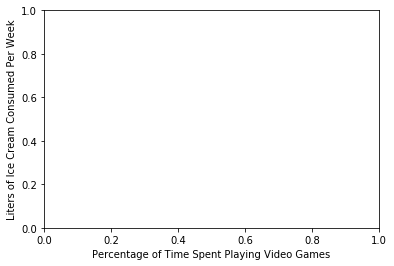

In [230]:
# x axis: Percentage of Time Spent Playing Video Games
# y axis: Liters of Ice Cream Consumed Per Week
ax.scatter(data1, data2, c=colors, s=markers, edgecolors='k')
plt.xlabel(title1)
plt.ylabel(title2)

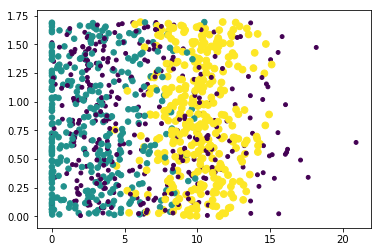

In [231]:
datingDataMat, datingLabels = kNN.file2matrix('datingTestSet2.txt')
np.array([int(x) for x in datingLabels[:10]]) * 15.0

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2],
           15.0*np.array([int(x) for x in datingLabels]),
           15.0*np.array([int(x) for x in datingLabels]))

In [234]:
type1 = ax.scatter([10], [-10], s=20, c='b')
type2 = ax.scatter([10], [-15], s=30, c='g')
type3 = ax.scatter([10], [-20], s=50, c='r')
ax.legend([type1, type2, type3], legendString, loc=1)
minX, maxX = min(data1), max(data1)
minY, maxY = min(data2), max(data2)
marginX, marginY = np.multiply(0.05, [maxX - minX, maxY - minY])
ax.axis([minX - marginX, maxX + marginX, minY - marginY, maxY + marginY])

[-1.04596745, 21.96531645, -0.08356205, 1.78023505]

In [239]:
plt.show()

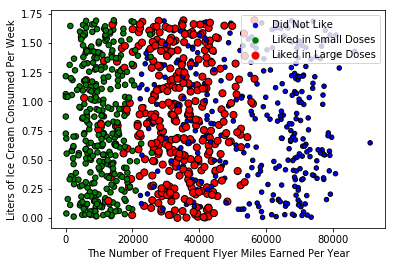

In [240]:
# x axis: The Number of Frequent Flyer Miles Earned Per Year
# y axis: Liters of Ice Cream Consumed Per Week
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data0, data2, c=colors, s=markers, edgecolors='k')
plt.xlabel(title0)
plt.ylabel(title2)
ax.legend([type1, type2, type3], legendString, loc=1)
minX, maxX = min(data0), max(data0)
minY, maxY = min(data2), max(data2)
marginX, marginY = np.multiply(0.05, [maxX - minX, maxY - minY])
ax.axis([minX - marginX, maxX + marginX, minY - marginY, maxY + marginY])
plt.show()

## 구별이 잘 안됨.

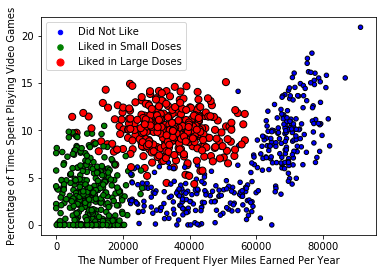

In [238]:
# x axis: The Number of Frequent Flyer Miles Earned Per Year
# y axis: Percentage of Time Spent Playing Video Games
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data0, data1, c=colors, s=markers, edgecolors='k')
plt.xlabel(title0)
plt.ylabel(title1)
ax.legend([type1, type2, type3], legendString, loc='best')
minX, maxX = min(data0), max(data0)
minY, maxY = min(data1), max(data1)
marginX, marginY = np.multiply(0.05, [maxX - minX, maxY - minY])
ax.axis([minX - marginX, maxX + marginX, minY - marginY, maxY + marginY])
plt.show()

# 마일리지와 비디오게임으로 하면 구별이 좀 됨.

### 특징들 간의 관계를 그림으로 분석한 결과:
 * '비디오 게임 시간'과 '연간 비행 마일 수'가 분류에 의미 있는 특징으로 결정됨
 * 즉, 헬렌이 좋아할만한 남자 친구를 찾는(분류하는) 특징으로 '비디오 게임 시간'과 '연간 비행 마일 수'를 선택

### List Comprehension with if else if else

In [ ]:
l = [22, 13, 45, 50, 98, 69, 43, 44, 1]
[x+1 if x >= 45 else x+5 for x in l]

In [ ]:
l = [1, 2, 3, 4, 5]
['yes' if v == 1 else 'no' if v == 2 else 'idle' for v in l]

## 2.2.3 Prepare: normalizing numeric values

### $ 교재 p.37 설명

#### 헬렌의 예에서 '연간 항공 마일리지 수' 특징이 거리를 계산하는데 있어 큰 영향을 미친다.
#### 원인:
 * 1) 해당 특징의 값 자체가 다른 특징보다 크다
 * 2) 특징 마다 값의 범위가 다르다

#### 정말로 해당 특징이 그만큼의 중요도가 있는가?
#### 헬렌은 세 가지 특징이 다 같은 정도의 중요도를 갖는다고 생각한다.
  - 하지만 연간 항공 마일리지 수는 다른 특징에 비해 값 자체가 크다.
  - 즉, 연간 항공 마일리지 수 특징의 값이 두 점 사이의 거리에 영향을 크게 미친다.
  - 즉, 연간 항공 마일리지 수의 중요도가 높다.

### Normalization (정규화)
 * 값의 범위를 [0, 1] 또는 [-1, 1]로 변환하는 것

#### [0, 1]로 정규화
  newValue = (oldValue - min) / (max - min)

##### Listing 2.3 Data-normailizing code for Python 2

In [242]:
import numpy as np

def autoNorm_p2(dataSet):
    # 각 특징별 최솟값, 최댓값, 범위를 구함
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
               # 
    # 정규화된 배열로 사용할, dataSet과 같은 크기를 갖는 영행렬 준비
    normDataSet = np.zeros(np.shape(dataSet))
    
    # dataSet의 각 행에서 최솟값을 빼기 위해 행 개수 준비
    m = dataSet.shape[0]
    
    # np.tile 함수를 사용하여 최솟값 벡터를 dataSet과 행 개수가 같은 최솟값 배열로 만든 후
    # dataSet 즉 oldValue에서 빼고 그 결과를 범위 배열로 나누어서 정규화된 값을 구함
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    
    # ranges와 minVals은 테스트 값에 대해 정규화할 필요가 있으므로 반환해야 함
    return normDataSet, ranges, minVals

In [243]:
import kNN
import importlib; importlib.reload(kNN)
import numpy as np

#datingDataMat, datingLabels = kNN.file2matrix('datingTestSet.txt')
dataSet, dataLabels = kNN.file2matrix('datingTestSet.txt')

##### NumPy array methods
 - https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html#array-methods

In [246]:
# 각 특징별 최솟값, 최댓값, 범위를 구함
minVals = dataSet.min(0)    # dataSet 배열의 열에 대한 최솟값, 0이 '열'을 의미
maxVals = dataSet.max(0)
ranges = maxVals - minVals 

ranges
# 범위가  - 마일리지, 아이스크림 소배, 비디오게임

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [247]:
# 정규화된 배열로 사용할, dataSet과 같은 크기를 갖는 영행렬 준비
normDataSet = np.zeros(np.shape(dataSet)); normDataSet

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [248]:
# dataSet의 각 행에서 최솟값을 빼기 위해 행 개수 준비
m = dataSet.shape[0]; m

1000

In [249]:
# np.tile 함수를 사용하여 최솟값 벡터를 dataSet과 행 개수가 같은 최솟값 배열로 만든 후
# dataSet 즉 oldValue에서 빼고 그 결과를 범위 배열로 나누어서 정규화된 값[0..1]을 구함
normDataSet = dataSet - np.tile(minVals, (m, 1))
normDataSet = normDataSet / np.tile(ranges, (m, 1))

In [250]:
np.tile(minVals, (m, 1))

array([[0.      , 0.      , 0.001156],
       [0.      , 0.      , 0.001156],
       [0.      , 0.      , 0.001156],
       ...,
       [0.      , 0.      , 0.001156],
       [0.      , 0.      , 0.001156],
       [0.      , 0.      , 0.001156]])

In [251]:
normDataSet

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

##### Listing 2.3 Data-normailizing code for Python 3

In [252]:
import kNN
import importlib; importlib.reload(kNN)
import numpy as np

In [253]:
def autoNorm(dataSet):
    # 각 특징별 최솟값, 최댓값, 범위를 구함
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    
    # 정규화된 배열을 구함
    normDataSet = (dataSet - minVals) / ranges
  # 1000 x 3                                     
    # ranges와 minVals은 테스트 값에 대해 정규화할 필요가 있으므로 반환해야 함
    return normDataSet, ranges, minVals

In [254]:
import kNN
import importlib; importlib.reload(kNN)

#datingDataMat, datingLabels = kNN.file2matrix('datingTestSet.txt')
dataSet, dataLabels = kNN.file2matrix('datingTestSet.txt')

In [255]:
# 각 특징별 최솟값, 최댓값, 범위를 구함
minVals = dataSet.min(0)
maxVals = dataSet.max(0)
ranges = maxVals - minVals; ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [256]:
# 정규화된 배열을 구함
normDataSet = (dataSet - minVals) / ranges; normDataSet           # 0~1 사이 값으로 메핑이 됨.

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

## 2.2.4 Test: testing the classifier as a whole program

### 기계 학습 알고리즘의 정확도
  * 데이터의 90% 정도를 분류기(classifier) 학습에 사용
  * 나머지 10%를 분류기의 정확도를 구하기 위한 테스트 데이터로 사용
  * 이 10% 데이터는 임의로 선택
  * 우리가 사용하는 데이터는 특정 순서로 저장된 것이 아니므로 처음 10% 또는 마지막 10%를 테스트 데이터로 선택하는 것이 임의로 10% 선택하는 것과 다를 바 없음
  
  ex) 100개 중 10개를 테스트, 90개 원본 => 9개를 테스트 => 81개 원본 =>   ....    학습한 데이터를 다른 곳에 또 쓰이지 않게끔 해주어야함!
  
### 에러율(error rate)
  * error rate = 잘못 분류된 데이터 수 / 전체 데이터 수
  * error rate = 0 ==> 완벽한 분류기
  * error rate = 1.0 ==> 항상 잘못 분류하는 분류기

##### Listing 2.4 Classifier testing code for dating site for Python 2

In [270]:
import kNN
import importlib; importlib.reload(kNN)
import numpy as np

def datingClassTest_p2():
    # 각종 변수 준비
    hoRatio = 0.10                    # 테스트 데이터 비율 (10%)
    datingDataMat, datingLabels = kNN.file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = kNN.autoNorm(datingDataMat)
    m = normMat.shape[0]              # 데이터 총 개수, 로우 수
          # 1000 
    numTestVecs = int(m * hoRatio)    # 테스트 데이터 개수
        # 1000건의 10% => 100개짜리 테스트용 데이터 
    errorCount = 0.0
        
    for i in range(numTestVecs):      # kNN 알고리즘에 들어있음 def 함수 / 
        classifierResult = kNN.classify0(normMat[i, :], normMat[numTestVecs:m, :], \
                                           # 정규화된                         1000 들어오면
                                         datingLabels[numTestVecs:m], 3)        # 3개의 점을 찾아서 
        # 교재에서는 %s 대신 %d, 교재대로 하려면 datingTestSet2.txt 파일을 사용
        print("the classifier came back with: %s, the real answer is: %s"\
                % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]):
            errorCount += 1.0
            print("!!!NOT MATCHED!!!")
    print("the total error rate is: %f" % (errorCount/float(numTestVecs)))   # 함수가 종료되면 에러율을 보여줌. 

In [271]:
import kNN
import importlib; importlib.reload(kNN)
import numpy as np

In [283]:
# 각종 변수 준비
hoRatio = 0.10                    # 테스트 데이터 비율 (10%)
datingDataMat, datingLabels = kNN.file2matrix('datingTestSet.txt')
normMat, ranges, minVals = kNN.autoNorm_p2(datingDataMat)
m = normMat.shape[0]              # 데이터 총 개수, 로우 수
numTestVecs = int(m * hoRatio)    # 테스트 데이터 개수
errorCount = 0.0
print(normMat)
print(ranges)
print(minVals)
print(m)
print(numTestVecs)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]
1000
100


In [284]:
i = 0

In [285]:
# i번째 테스트 데이터
normMat[i, :]

array([0.44832535, 0.39805139, 0.56233353])

In [286]:
# 훈련 데이터
normMat[numTestVecs:m, :].shape

(900, 3)

In [287]:
# 레이블 데이터
len(datingLabels[numTestVecs:m])         # 900번

900

In [288]:
# kNN 수행: k 값은 3
classifierResult = kNN.classify0(normMat[i, :], normMat[numTestVecs:m, :],
                                datingLabels[numTestVecs:m], 3)
classifierResult

'largeDoses'

In [295]:
print("the classifier came back with: %s, the real answer is: %s"\
                % (classifierResult, datingLabels[i]))

the classifier came back with: largeDoses, the real answer is: didntLike


In [311]:
if (classifierResult != datingLabels[i]):
    errorCount += 1.0
errorCount

15.0

In [312]:
# i 값을 변경시켜가며 결과를 확인해 본다.
i = 99

# kNN 수행: k 값은 3
classifierResult = kNN.classify0(normMat[i, :], normMat[numTestVecs:m, :],
                                datingLabels[numTestVecs:m], 3)
print("the classifier came back with: %s, the real answer is: %s"\
                % (classifierResult, datingLabels[i]))
if (classifierResult != datingLabels[i]):
    errorCount += 1.0
errorCount

the classifier came back with: largeDoses, the real answer is: didntLike


16.0

In [313]:
datingClassTest_p2()

the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: smallDoses, the real answer is: smallDoses
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: smallDoses, the real answer is: smallDoses
the classifier came back with: didntLike, the real a

##### Listing 2.4 Classifier testing code for dating site for Python 3

In [ ]:
# 샘파일로 비교해서 돌려볼 것

In [2]:
import kNN
import importlib; importlib.reload(kNN)
import numpy as np

def datingClassTest_p2():
    # 각종 변수 준비
    hoRatio = 0.10                    # 테스트 데이터 비율 (10%)
    datingDataMat, datingLabels = kNN.file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = kNN.autoNorm(datingDataMat)
    m = normMat.shape[0]              # 데이터 총 개수, 로우 수
    numTestVecs = int(m * hoRatio)    # 테스트 데이터 개수
    errorCount = 0.0
        
    for i in range(numTestVecs):
        classifierResult = kNN.classify0(normMat[i, :], normMat[numTestVecs:m, :], \
                                         datingLabels[numTestVecs:m], 3)        
        # 교재에서는 %s 대신 %d, 교재대로 하려면 datingTestSet2.txt 파일을 사용
        print("the classifier came back with: %s, the real answer is: %s"\
                % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]):
            errorCount += 1.0
            print("!!!NOT MATCHED!!!")
    print("the total error rate is: %f" % (errorCount/float(numTestVecs)))

SyntaxError: Non-ASCII character '\xeb' in file kNN.py on line 18, but no encoding declared; see http://python.org/dev/peps/pep-0263/ for details (kNN.py, line 18)

In [3]:
import kNN
import importlib; importlib.reload(kNN)
import numpy as np

SyntaxError: Non-ASCII character '\xeb' in file kNN.py on line 18, but no encoding declared; see http://python.org/dev/peps/pep-0263/ for details (kNN.py, line 18)

In [4]:
# 각종 변수 준비
hoRatio = 0.10                    # 테스트 데이터 비율 (10%)
datingDataMat, datingLabels = kNN.file2matrix('datingTestSet.txt')
normMat, ranges, minVals = kNN.autoNorm_p2(datingDataMat)
m = normMat.shape[0]              # 데이터 총 개수, 로우 수
numTestVecs = int(m * hoRatio)    # 테스트 데이터 개수
errorCount = 0.0
print(normMat)
print(ranges)
print(minVals)
print(m)
print(numTestVecs)

NameError: name 'kNN' is not defined

In [17]:
classifierResult = [kNN.classify0(normMat[i, :], normMat[numTestVecs:m, :], 
                            datingLabels[numTestVecs:m], 3) for i in range(numTestVecs)]

NameError: name 'numTestVecs' is not defined

In [8]:
numTestVecs

NameError: name 'numTestVecs' is not defined

In [9]:
normMat.shape

NameError: name 'normMat' is not defined

In [10]:
a = np.array(classifierResult) != np.array(datingLabels[:numTestVecs])

NameError: name 'classifierResult' is not defined

In [11]:
np.array(datingLabels[:numTestVecs])[a].size

NameError: name 'datingLabels' is not defined

In [12]:
normMat.size

NameError: name 'normMat' is not defined

In [13]:
aa

NameError: name 'aa' is not defined

In [ ]:
a = [1, 2, 3,4, 5]

In [ ]:
np.array(a) > 3

In [ ]:
type(ranges)

In [ ]:
ranges.size

In [ ]:
datingClassTest_v1('datingTestSet.txt')

In [ ]:
datingClassTest_v1('datingTestSet.txt', k = 7)

In [19]:
datingClassTest_v1('datingTestSet.txt', k = 9)        # k값을 무조건 늘린다고 해서 에러율이 낮아진다? ㄴㄴ

NameError: name 'm' is not defined

In [ ]:
datingClassTest_v1('datingTestSet.txt', k = 11)

## 2.2.5 Use: putting together a useful system

In [32]:
import kNN
import importlib
importlib.reload(kNN)

import numpy as np

##### Listing 2.5 Dating site predictor function Python 2

In [36]:
def classifyPerson():
    resultList = ['not at all','in small doses', 'in large doses']
    percentTats = float(raw_input(\
                 "percentage of time spent playing video games?"))
    ffMiles = float(raw_input("frequent flier miles earned per year?"))
    iceCream = float(raw_input("liters of ice cream consumed per year?"))
    datingDataMat,datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr-minVals)/ranges,
                                 normMat, datingLabels, 3)
    print ("You will probably like this person: ", resultList[classifierResult - 1])

##### Listing 2.5 Dating site predictor function Python 3

In [37]:
def classifyPerson():
    resultList = ['not at all','in small doses', 'in large doses']
    percentTats = float(input(\
                 "percentage of time spent playing video games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = np.array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr-\
                   minVals)/ranges,normMat,datingLabels,3)
    print("You will probably like this person:",
              #classifierResult)    # for datingTestSet.txt
                   resultList[int(classifierResult) - 1])

In [38]:
classifyPerson()

percentage of time spent playing video games?1.5
frequent flier miles earned per year?54321
liters of ice cream consumed per year?1.5


NameError: name 'file2matrix' is not defined

## 2.3 Example: a handwriting recognition system

1. Collect:
  - 텍스트 파일로 제공됨, 2000여개의 샘플
2. Prepare:
  - 이미지 포맷을 리스트 포맷으로 변환하는 함수 작성
  - 이렇게 변환된 리스트는 앞서 작성한 kNN 분류 함수 classify0()에 사용됨
3. Analyze:
  - 리스트 포맷으로 잘 변환되었는지 파이썬 셀에서 확인
4. Train:
  - kNN은 훈련 과정이 없음
5. Test:
  - 데이터 일부를 테스트 예제(샘플)로 사용하는 함수 작성
  - 이 함수를 통해 테스트 데이터와 kNN 데이터로 구분
  - 테스트 데이터의 분류 예측 결과와 실제 클래스가 일치하지 않으면 에러로 처리
6. Use:
  - 여기서는 수행하지 않음
  - 필요하다면 이를 응용한 애플리케이션 작성 가능
    - 우편 봉투 이미지에서 우편 번호를 추출하여 우편물 정리하는데 이용 등
    - 다른 활용예도 생각해 봅시다

### 2.3.1 Prepare: converting images into test vectors

  * 숫자 이미지 크기: 32x32
  * 훈련용 데이터: 2,000 개
    - 번호별 약 200개 표본
    - 번호별 디렉터리에 존재
  * 테스트용 데이터: 약 900 개
  
  
  * 2차원 이미지 데이터를 1차원 벡터로 변환
    - 32x32 ==> 1x1024
    - 이전에 개발한 classify0() 분류기 함수를 사용하기 위해
    - img2vector()

##### Listing Converting number image to vector Python 3

In [ ]:
def img2vector(filename):
    returnVect = pd.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

### 2.3.2 Analyze: looking at the prepared data in the Python shell to make sure it’s correct
  - testDigits/0_13.txt를 편집기로 열어서 아래 testVector의 내용과 일치하는지 확인

In [ ]:
testVector = kNN.img2vector('testDigits/0_13.txt')
testVector[0, 0:31]
testVector[0, 32:63]

### 2.3.3 Test: kNN on handwritten digits

##### Listing 2.6 Handwritten digits testing code

In [ ]:
def handwritingClassTest():
    hwLabels = []
    trainingFileList = os.listdir('trainingDigits')   
    m = len(trainingFileList)
    trainingMat = np.zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]        
        fileStr = fileNameStr.split('.')[0]             
        classNumStr = int(fileStr.split('_')[0]) 
        hwLabels.append(classNumStr)
        trainingMat[i,:] = kNN.img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = os.listdir('testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = kNN.img2vector('testDigits/%s' % fileNameStr)
        classifierResult = kNN.classify0(vectorUnderTest, \
                                trainingMat, hwLabels, 3)
        print "the classifier came back with: %d, the real answer is: %d"\
                                % (classifierResult, classNumStr)
        if (classifierResult != classNumStr): errorCount += 1.0
    print("\nthe total number of errors is: %d" % errorCount)
    print("\nthe total error rate is: %f" % (errorCount/float(mTest)))

In [ ]:
kNN.handwritingClassTest()

## 2.4 Summary
  * 특징
    - instance-based learning의 한 예
  * 장점
    - 간단
    - 분류에 효과적
  * 단점
    - 전체 데이터를 다루어야 하므로 큰 데이터 집합을 처리하려면 큰 저장소 필요
    - 모든 데이터에 대해 거리 계산 --> 연산 부담
    - 데이터 구조에 대한 어떠한 정보도 얻을 수 없음
      - 같은 부류의 데이터에 대한 평균, 모범예 등을 알 수 없음    